In [1]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
%matplotlib inline

from spacy.vectors import Vectors
from spacy.strings import StringStore
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('../ProteomeXchange/scraped_pubmed_latest.csv')
df = df.dropna()
df.describe()

Dataset ID      PMID                                          Title  \
count        4315      4315                                           4315   
unique       4315      3670                                           3643   
top     PXD004450  28267743  Digitoxin metabolism by rat liver microsomes.   
freq            1        28                                             34   

                                      Journal  \
count                                    4315   
unique                                    433   
top     Molecular & cellular proteomics : MCP   
freq                                      628   

                                                 Abstract  
count                                                4315  
unique                                               3660  
top     Targeted proteomics approaches are of value fo...  
freq                                                   28

In [3]:
df.reset_index(inplace=True)

In [4]:
df.head(2)

index Dataset ID      PMID  \
0      0  PXD000001  23692960   
1      2  PXD000003  22786679   

                                               Title  \
0  Using R and Bioconductor for proteomics data a...   
1  Reproducible quantification of cancer-associat...   

                          Journal  \
0   Biochimica et biophysica acta   
1  Science translational medicine   

                                            Abstract  
0  This review presents how R, the popular statis...  
1  The rigorous testing of hypotheses on suitable...

In [5]:
abs1 = df.Abstract.iloc[0]
abs1

'This review presents how R, the popular statistical environment and programming language, can be used in the frame of proteomics data analysis. A short introduction to R is given, with special emphasis on some of the features that make R and its add-on packages premium software for sound and reproducible data analysis. The reader is also advised on how to find relevant R software for proteomics. Several use cases are then presented, illustrating data input/output, quality control, quantitative proteomics and data analysis. Detailed code and additional links to extensive documentation are available in the freely available companion package RforProteomics. This article is part of a Special Issue entitled: Computational Proteomics in the Post-Identification Era. Guest Editors: Martin Eisenacher and Christian Stephan. '

In [6]:
nlp = spacy.load('en_core_web_lg')

##### Tokenization

In [7]:
doc1 = nlp(abs1)
for token in doc1:
    print("Index%3d: %s, %s, %s, %s, %s, %s" \
          % (token.idx, 
                token.lemma_,
                token.is_punct,
                token.is_space,
                token.shape_,
                token.pos_,
                token.tag_))

Index  0: this, False, False, Xxxx, DET, DT
Index  5: review, False, False, xxxx, NOUN, NN
Index 12: present, False, False, xxxx, VERB, VBZ
Index 21: how, False, False, xxx, ADV, WRB
Index 25: r, False, False, X, NOUN, NN
Index 26: ,, True, False, ,, PUNCT, ,
Index 28: the, False, False, xxx, DET, DT
Index 32: popular, False, False, xxxx, ADJ, JJ
Index 40: statistical, False, False, xxxx, ADJ, JJ
Index 52: environment, False, False, xxxx, NOUN, NN
Index 64: and, False, False, xxx, CCONJ, CC
Index 68: programming, False, False, xxxx, NOUN, NN
Index 80: language, False, False, xxxx, NOUN, NN
Index 88: ,, True, False, ,, PUNCT, ,
Index 90: can, False, False, xxx, VERB, MD
Index 94: be, False, False, xx, VERB, VB
Index 97: use, False, False, xxxx, VERB, VBN
Index102: in, False, False, xx, ADP, IN
Index105: the, False, False, xxx, DET, DT
Index109: frame, False, False, xxxx, NOUN, NN
Index115: of, False, False, xx, ADP, IN
Index118: proteomics, False, False, xxxx, NOUN, NN
Index129: datum, 

In [8]:
doc1.print_tree()

/usr/lib64/python3.6/runpy.py:193: DeprecationWarning: [W003] Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)
/usr/lib64/python3.6/runpy.py:193: DeprecationWarning: [W003] Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)
/usr/lib64/python3.6/runpy.py:193: DeprecationWarning: [W003] Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)
/usr/lib64/python3.6/runpy.py:193: DeprecationWarning: [W003] Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)
/usr/lib64/python3.6/runpy.py:193: DeprecationWarning: [W003] Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for exam

[{'word': 'presents',
  'lemma': 'present',
  'NE': '',
  'POS_fine': 'VBZ',
  'POS_coarse': 'VERB',
  'arc': 'ROOT',
  'modifiers': [{'word': 'review',
    'lemma': 'review',
    'NE': '',
    'POS_fine': 'NN',
    'POS_coarse': 'NOUN',
    'arc': 'nsubj',
    'modifiers': [{'word': 'This',
      'lemma': 'this',
      'NE': '',
      'POS_fine': 'DT',
      'POS_coarse': 'DET',
      'arc': 'det',
      'modifiers': []}]},
   {'word': 'used',
    'lemma': 'use',
    'NE': '',
    'POS_fine': 'VBN',
    'POS_coarse': 'VERB',
    'arc': 'ccomp',
    'modifiers': [{'word': 'how',
      'lemma': 'how',
      'NE': '',
      'POS_fine': 'WRB',
      'POS_coarse': 'ADV',
      'arc': 'advmod',
      'modifiers': []},
     {'word': 'R',
      'lemma': 'r',
      'NE': '',
      'POS_fine': 'NN',
      'POS_coarse': 'NOUN',
      'arc': 'nsubjpass',
      'modifiers': [{'word': ',',
        'lemma': ',',
        'NE': '',
        'POS_fine': ',',
        'POS_coarse': 'PUNCT',
        'arc':

##### Sentence

In [9]:
for sent in doc1.sents:
    print(sent, '\n')

This review presents how R, the popular statistical environment and programming language, can be used in the frame of proteomics data analysis. 

A short introduction to R is given, with special emphasis on some of the features that make R and its add-on packages premium software for sound and reproducible data analysis. 

The reader is also advised on how to find relevant R software for proteomics. 

Several use cases are then presented, illustrating data input/output, quality control, quantitative proteomics and data analysis. 

Detailed code and additional links to extensive documentation are available in the freely available companion package RforProteomics. 

This article is part of a Special Issue entitled: Computational Proteomics in the Post-Identification Era. 

Guest Editors: Martin Eisenacher and Christian Stephan. 



##### Named Entity Recognition

In [10]:
for ent in doc1.ents:
    print(ent.text, ent.label_)

RforProteomics PRODUCT
Computational Proteomics ORG
the Post-Identification Era ORG
Martin Eisenacher PERSON
Christian Stephan PERSON


In [11]:
from spacy import displacy
displacy.render(doc1, style='ent', jupyter=True)

##### Chunking

In [12]:
for chunk in doc1.noun_chunks:
    print(chunk.text, chunk.label_, chunk.root.text)

This review NP review
R NP R
the popular statistical environment NP environment
programming language NP language
the frame NP frame
proteomics data analysis NP analysis
A short introduction NP introduction
R NP R
special emphasis NP emphasis
the features NP features
R NP R
its add-on packages premium software NP software
sound and reproducible data analysis NP analysis
The reader NP reader
relevant R software NP software
proteomics NP proteomics
Several use cases NP cases
data input/output NP output
quality control NP control
quantitative proteomics NP proteomics
data analysis NP analysis
Detailed code NP code
additional links NP links
extensive documentation NP documentation
the freely available companion package RforProteomics NP RforProteomics
This article NP article
part NP part
a Special Issue NP Issue
Computational Proteomics NP Proteomics
the Post-Identification Era NP Era
Guest Editors NP Editors
Martin Eisenacher NP Eisenacher
Christian Stephan NP Stephan


##### Dependency

In [13]:
for token in doc1:
        print("{0}({1}) <--{2}-- {3}({4})".format(
                                token.text, 
                                token.tag_, 
                                token.dep_, 
                                token.head.text, 
                                token.head.tag_))

This(DT) <--det-- review(NN)
review(NN) <--nsubj-- presents(VBZ)
presents(VBZ) <--ROOT-- presents(VBZ)
how(WRB) <--advmod-- used(VBN)
R(NN) <--nsubjpass-- used(VBN)
,(,) <--punct-- R(NN)
the(DT) <--det-- environment(NN)
popular(JJ) <--amod-- environment(NN)
statistical(JJ) <--amod-- environment(NN)
environment(NN) <--appos-- R(NN)
and(CC) <--cc-- environment(NN)
programming(NN) <--compound-- language(NN)
language(NN) <--conj-- environment(NN)
,(,) <--punct-- R(NN)
can(MD) <--aux-- used(VBN)
be(VB) <--auxpass-- used(VBN)
used(VBN) <--ccomp-- presents(VBZ)
in(IN) <--prep-- used(VBN)
the(DT) <--det-- frame(NN)
frame(NN) <--pobj-- in(IN)
of(IN) <--prep-- frame(NN)
proteomics(NN) <--compound-- data(NNS)
data(NNS) <--compound-- analysis(NN)
analysis(NN) <--pobj-- of(IN)
.(.) <--punct-- presents(VBZ)
A(DT) <--det-- introduction(NN)
short(JJ) <--amod-- introduction(NN)
introduction(NN) <--nsubjpass-- given(VBN)
to(IN) <--prep-- introduction(NN)
R(NN) <--pobj-- to(IN)
is(VBZ) <--auxpass-- given

In [14]:
displacy.render(doc1, style='dep', jupyter=True, 
                        options={'distance': 80})

##### Word Vector

In [15]:
doc2 = nlp(df.Abstract.iloc[1])
doc3 = nlp(df.Abstract.iloc[2])
doc4 = nlp(df.Abstract.iloc[3])

In [16]:
doc2

The rigorous testing of hypotheses on suitable sample cohorts is a major limitation in translational research. This is particularly the case for the validation of protein biomarkers; the lack of accurate, reproducible, and sensitive assays for most proteins has precluded the systematic assessment of hundreds of potential marker proteins described in the literature. Here, we describe a high-throughput method for the development and refinement of selected reaction monitoring (SRM) assays for human proteins. The method was applied to generate such assays for more than 1000 cancer-associated proteins, which are functionally related to candidate cancer driver mutations. We used the assays to determine the detectability of the target proteins in two clinically relevant samples: plasma and urine. One hundred eighty-two proteins were detected in depleted plasma, spanning five orders of magnitude in abundance and reaching below a concentration of 10 ng/ml. The narrower concentration range of pr

In [17]:
doc3

Synaptic architecture and its adaptive changes require numerous molecular events that are both highly ordered and complex. A majority of neuropsychiatric illnesses are complex trait disorders, in which multiple etiologic factors converge at the synapse via many signaling pathways. Investigating the protein composition of synaptic microdomains from human patient brain tissues will yield valuable insights into the interactions of risk genes in many disorders. These types of studies in postmortem tissues have been limited by the lack of proper study paradigms. Thus, it is necessary not only to develop strategies to quantify protein and post-translational modifications at the synapse, but also to rigorously validate them for use in postmortem human brain tissues. In this study we describe the development of a liquid chromatography-selected reaction monitoring method, using a stable isotope-labeled neuronal proteome standard prepared from the brain tissue of a stable isotope-labeled mouse, 

In [18]:
doc4

Fbw7 is a ubiquitin-ligase that targets several oncoproteins for proteolysis, but the full range of Fbw7 substrates is not known. Here we show that by performing quantitative proteomics combined with degron motif searches, we effectively screened for a more complete set of Fbw7 targets. We identify 89 putative Fbw7 substrates, including several disease-associated proteins. The transcription factor NF-κB2 (p100/p52) is one of the candidate Fbw7 substrates. We show that Fbw7 interacts with p100 via a conserved degron and that it promotes degradation of p100 in a GSK3β phosphorylation-dependent manner. Fbw7 inactivation increases p100 levels, which in the presence of NF-κB pathway stimuli, leads to increased p52 levels and activity. Accordingly, the apoptotic threshold can be increased by loss of Fbw7 in a p100-dependent manner. In conclusion, Fbw7-mediated destruction of p100 is a regulatory component restricting the response to NF-κB2 pathway stimulation.

##### Calculate similarities (Use default vector)

In [19]:
from itertools import combinations

labels = list(df.head(4)['Dataset ID'])
data = {
    'PXD000001': doc1,
    'PXD000003': doc2,
    'PXD000004': doc3,
    'PXD000005': doc4
       }

for i, combo in enumerate(combinations(labels, 2)):
    d1 = data[combo[0]]
    d2 = data[combo[1]]
    similarity = d1.similarity(d2)
    print("%s vs %s similarity = %f" % (combo[0], combo[1], similarity))

PXD000001 vs PXD000003 similarity = 0.918641
PXD000001 vs PXD000004 similarity = 0.892814
PXD000001 vs PXD000005 similarity = 0.891710
PXD000003 vs PXD000004 similarity = 0.971551
PXD000003 vs PXD000005 similarity = 0.956472
PXD000004 vs PXD000005 similarity = 0.952455


##### Get Named Entity Recognizer

In [20]:
for label in labels:
    doc = data[label]
    print('='*5, label, '='*10)
    for ent in doc.ents:
        print(ent.text, ent.label_)

===== PXD000001 ==========
RforProteomics PRODUCT
Computational Proteomics ORG
the Post-Identification Era ORG
Martin Eisenacher PERSON
Christian Stephan PERSON
===== PXD000003 ==========
hundreds CARDINAL
SRM ORG
more than 1000 CARDINAL
two CARDINAL
One hundred eighty-two CARDINAL
five CARDINAL
10 ng/ml QUANTITY
408 CARDINAL
SRM ORG
34 CARDINAL
83 CARDINAL
SRM ORG
===== PXD000004 ==========
100 CARDINAL
1000 CARDINAL
===== PXD000005 ==========
89 CARDINAL
NF-κB2 GPE
one CARDINAL
NF-κB2 GPE


In [21]:
people = [item.text for item in doc1.ents if item.label_ == 'PERSON']
people

['Martin Eisenacher', 'Christian Stephan']

Obviously many of the labels are wrong and needs tuning (if desired)

##### More on similarity using Biomedical Vectors

I was able to download two sets of pre-trained word vectors related to the biomedical field. Used both of them and checked how the calculation changes from the default spaCy vectors.

With biomedicalWordVectors

In [22]:
bio_vector = Vectors()
bio_vector.from_disk('/home/ryohayama/nlp_vectors/biomedicalWordVectors/vectors.txt')
bio_nlp = spacy.load('en',vector=bio_vector)

bio_doc1 = bio_nlp(df.Abstract.iloc[0])
bio_doc2 = bio_nlp(df.Abstract.iloc[1])
bio_doc3 = bio_nlp(df.Abstract.iloc[2])
bio_doc4 = bio_nlp(df.Abstract.iloc[3])

labels = list(df.head(4)['Dataset ID'])
data2 = {
    'PXD000001': bio_doc1,
    'PXD000003': bio_doc2,
    'PXD000004': bio_doc3,
    'PXD000005': bio_doc4
       }

for i, combo in enumerate(combinations(labels, 2)):
    d1 = data2[combo[0]]
    d2 = data2[combo[1]]
    similarity = d1.similarity(d2)
    print("%s vs %s similarity = %f" % (combo[0], combo[1], similarity))

PXD000001 vs PXD000003 similarity = 0.942089
PXD000001 vs PXD000004 similarity = 0.926497
PXD000001 vs PXD000005 similarity = 0.949669
PXD000003 vs PXD000004 similarity = 0.955454
PXD000003 vs PXD000005 similarity = 0.956727
PXD000004 vs PXD000005 similarity = 0.945501


With bio_npl_vec

In [23]:
bio_vector = Vectors()
bio_vector.from_disk('/home/ryohayama/nlp_vectors/bio_nlp_vec/PubMed-shuffle-win-2.bin')
bio_nlp = spacy.load('en',vector=bio_vector)

bio_doc1 = bio_nlp(df.Abstract.iloc[0])
bio_doc2 = bio_nlp(df.Abstract.iloc[1])
bio_doc3 = bio_nlp(df.Abstract.iloc[2])
bio_doc4 = bio_nlp(df.Abstract.iloc[3])

labels = list(df.head(4)['Dataset ID'])
data2 = {
    'PXD000001': bio_doc1,
    'PXD000003': bio_doc2,
    'PXD000004': bio_doc3,
    'PXD000005': bio_doc4
       }

for i, combo in enumerate(combinations(labels, 2)):
    d1 = data2[combo[0]]
    d2 = data2[combo[1]]
    similarity = d1.similarity(d2)
    print("%s vs %s similarity = %f" % (combo[0], combo[1], similarity))

PXD000001 vs PXD000003 similarity = 0.942089
PXD000001 vs PXD000004 similarity = 0.926497
PXD000001 vs PXD000005 similarity = 0.949669
PXD000003 vs PXD000004 similarity = 0.955454
PXD000003 vs PXD000005 similarity = 0.956727
PXD000004 vs PXD000005 similarity = 0.945501


First, error occured when loading by from_bytes, saying string was input. So now I replaced it with from_disk and I get the same result as the above...

It appears that the two downloaded vectors gave pretty much identical result. I'm using the one with bigger file size from here. Extend to first 10 abstracts

In [24]:
bio_vector = Vectors()
bio_vector.from_disk('/home/ryohayama/nlp_vectors/biomedicalWordVectors/vectors.txt')
bio_nlp = spacy.load('en',vector=bio_vector)

n = 10
data = {}
labels = []
for i in range(10):
    label = df['Dataset ID'].iloc[i]
    labels.append(label)
    
    d = bio_nlp(df.Abstract.iloc[i])
    data[label] = d

for i, combo in enumerate(combinations(labels, 2)):
    d1 = data[combo[0]]
    d2 = data[combo[1]]
    similarity = d1.similarity(d2)
    print("%s vs %s similarity = %f" % (combo[0], combo[1], similarity))

PXD000001 vs PXD000003 similarity = 0.942089
PXD000001 vs PXD000004 similarity = 0.926497
PXD000001 vs PXD000005 similarity = 0.949669
PXD000001 vs PXD000006 similarity = 0.951015
PXD000001 vs PXD000008 similarity = 0.939860
PXD000001 vs PXD000009 similarity = 0.969106
PXD000001 vs PXD000011 similarity = 0.949832
PXD000001 vs PXD000012 similarity = 0.941783
PXD000001 vs PXD000013 similarity = 0.936870
PXD000003 vs PXD000004 similarity = 0.955454
PXD000003 vs PXD000005 similarity = 0.956727
PXD000003 vs PXD000006 similarity = 0.928172
PXD000003 vs PXD000008 similarity = 0.932975
PXD000003 vs PXD000009 similarity = 0.945294
PXD000003 vs PXD000011 similarity = 0.936896
PXD000003 vs PXD000012 similarity = 0.936231
PXD000003 vs PXD000013 similarity = 0.950446
PXD000004 vs PXD000005 similarity = 0.945501
PXD000004 vs PXD000006 similarity = 0.912857
PXD000004 vs PXD000008 similarity = 0.937109
PXD000004 vs PXD000009 similarity = 0.943257
PXD000004 vs PXD000011 similarity = 0.954557
PXD000004 

##### Clustering

So the vector for each doc is calculated by the default method of spacy (I think it's the average of the vectors in the document), but it is probably not the best way to do it. Here for now, I'll use that doc.vector for clustering.

Pairwise cosine distances are calculated for the doc vector space and clustered with different linkage metric.

In [25]:
len(df)

4315

Calculate cosine distances

In [26]:
%%time
# Calculate pairwise distance using pdist. Use cosine distance here
# Collect vector from each doc, create a vector of coordinates (m x n matrix)
m = 500
labels = list(df['Dataset ID'].iloc[:m])
docs1 = [bio_nlp(df.Abstract.iloc[i]) for i in range(m)]
vecs1 = np.array([doc.vector for doc in docs1])
print(vecs1.shape)

# Calculate pairwise cosine distance
Xcos_dist = scipy.spatial.distance.pdist(vecs1, metric='cosine')
print(Xcos_dist.shape)

(500, 384)
(124750,)
CPU times: user 1min 42s, sys: 1min 34s, total: 3min 17s
Wall time: 24.9 s


'single' linkage (i.e. nearest point)

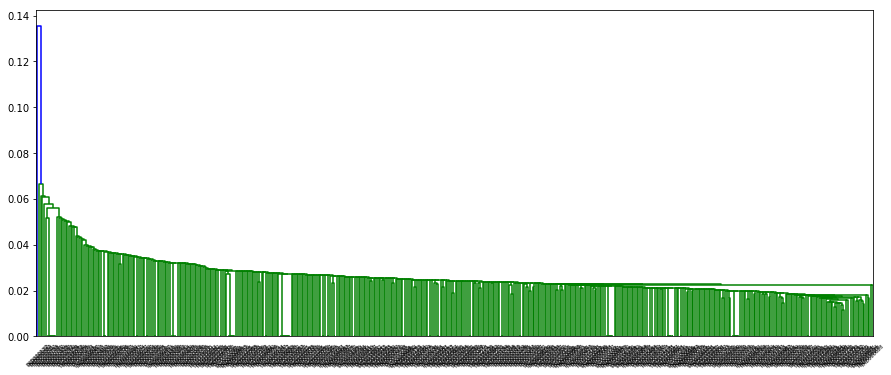

In [27]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
Z = linkage(Xcos_dist, 'single')
dn = dendrogram(Z, ax=ax, labels=labels)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

'complete' linkage

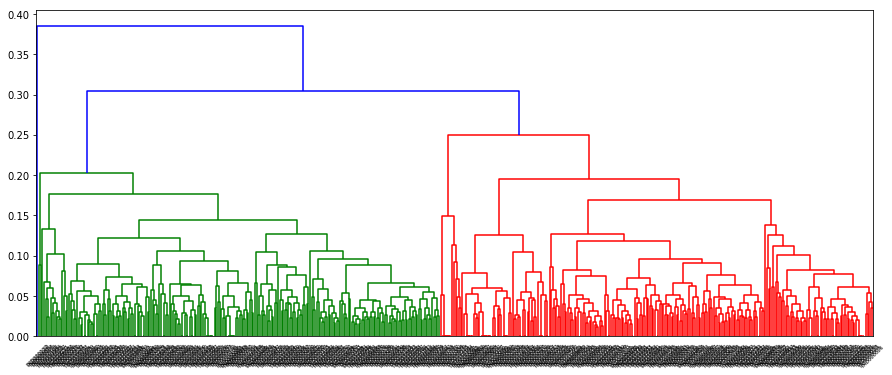

In [28]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
Z = linkage(Xcos_dist, 'complete')
dn = dendrogram(Z, ax=ax, labels=labels)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

'average' linkage

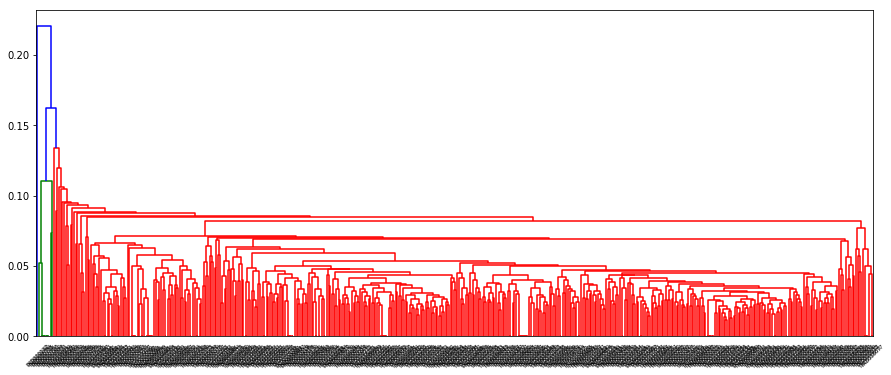

In [29]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
Z = linkage(Xcos_dist, 'average')
dn = dendrogram(Z, ax=ax, labels=labels)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

'centroid' linkage

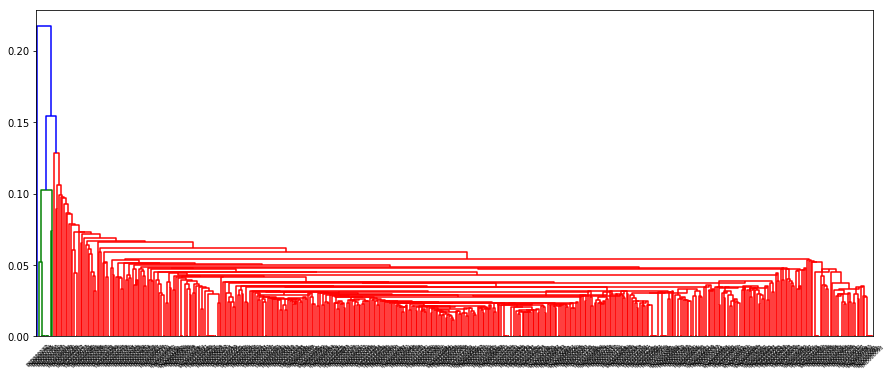

In [30]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
Z = linkage(Xcos_dist, 'centroid')
dn = dendrogram(Z, ax=ax, labels=labels)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

'ward' linkage

In [31]:
Z = linkage(Xcos_dist, 'ward')

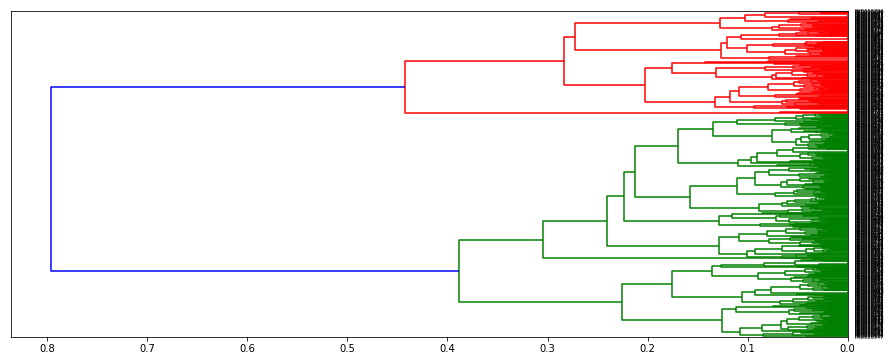

In [32]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
dn = dendrogram(Z, ax=ax, orientation='left', labels=labels)

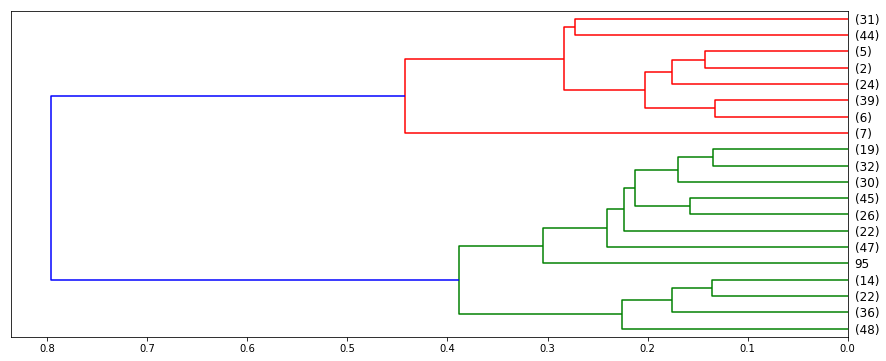

In [33]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
dn = dendrogram(Z, truncate_mode='lastp', p =20, ax=ax, orientation='left')

In [34]:
fcluster = scipy.cluster.hierarchy.fcluster(
    Z, 0.15, criterion='distance', depth=2, R=None, monocrit=None)

In [61]:
cluster_counts = pd.Series(fcluster).value_counts()
cluster_counts.sort_values(ascending=True)

10     1
14     7
11     7
5     22
13    24
6     26
8     30
16    31
3     36
2     36
15    44
12    45
7     45
4     47
1     48
9     51
dtype: int64

In [62]:
len(cluster_counts)

16

In [43]:
cluster5 = (np.argwhere(fcluster == 5).flatten())
for i in cluster5:
    print('===== %s =====' % labels[i])
    print(docs1[i].text)

===== PXD000056 =====
Glaucophytes represent the first lineage of photosynthetic eukaryotes of primary endosymbiotic origin that diverged after plastid establishment. The muroplast of Cyanophora paradoxa represents a primitive plastid that resembles its cyanobacterial ancestor in pigment composition and the presence of a peptidoglycan wall. To attain insights into the evolutionary history of cyanobiont integration and plastid development, it would thus be highly desirable to obtain knowledge on the composition of the glaucophyte plastid proteome. Here, we provide the first proteomic analysis of the muroplast of C. paradoxa. Mass spectrometric analysis of the muroplast proteome identified 510 proteins with high confidence. The protein repertoire of the muroplast revealed novel paths for reduced carbon flow and export to the cytosol through a sugar phosphate transporter of chlamydial origin. We propose that C. paradoxa possesses a primordial plastid mirroring the situation in the early p

In [42]:
cluster10 = (np.argwhere(fcluster == 10).flatten())
for i in cluster10:
    print('===== %s =====' % labels[i])
    print(docs1[i].text)

===== PXD000132 =====
Small cell lung cancers (SCLC) are heterogeneous and tumours differ in growth characteristics and treatment resistance.


In [37]:
cluster11 = (np.argwhere(fcluster == 11).flatten())
for i in cluster11:
    print('===== %s =====' % labels[i])
    print(docs1[i].text)

===== PXD000247 =====
Soybean (Glycine max (L.) Merr. cv Jack) seed development was separated into nine defined stages (S1 to S9). Testa (seed coats) were removed from developing seeds at stages S2, 4, 6, 8, and 9, and subjected to shotgun proteomic profiling. For each stage "total proteins" were isolated from 150 mg dry weight of seed coat using a phenol-based method, then reduced, alkylated, and digested with trypsin. The tryptic peptides were separated using a C18-reversed phase matrix, then analyzed using an LTQ Orbitrap Mass Spectrometer. Spectra were searched against the Phytozome G. max DB using the Sorcerer 2 IDA Sequest-based search algorithm. Identities were verified using Scaffold 3. A total of 306 (S2), 328 (S4), 273 (S6), 193 (S8), and 272 (S9) proteins were identified in three out of three biological replicates, and sorted into 11 functional groups: Primary Metabolism, Secondary Metabolism, Cellular Structure, Stress Responses, Nucleic Acid metabolism, Protein Synthesis, 

In [38]:
cluster14 = (np.argwhere(fcluster == 14).flatten())
for i in cluster14:
    print('===== %s =====' % labels[i])
    print(docs1[i].text)

===== PXD000212 =====
DNA mismatch repair (MMR) is an evolutionarily conserved process that corrects DNA polymerase errors during replication to maintain genomic integrity. In E. coli, the DNA helicase UvrD is implicated in MMR, yet an analogous helicase activity has not been identified in eukaryotes. Here, we show that mammalian MCM9, a protein involved in replication and homologous recombination, forms a complex with MMR initiation proteins (MSH2, MSH3, MLH1, PMS1, and the clamp loader RFC) and is essential for MMR. Mcm9-/- cells display microsatellite instability and MMR deficiency. The MCM9 complex has a helicase activity that is required for efficient MMR since wild-type but not helicase-dead MCM9 restores MMR activity in Mcm9-/- cells. Moreover, MCM9 loading onto chromatin is MSH2-dependent, and in turn MCM9 stimulates the recruitment of MLH1 to chromatin. Our results reveal a role for MCM9 and its helicase activity in mammalian MMR.
===== PXD000384 =====
Wounding, apoptosis, or 

In [73]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

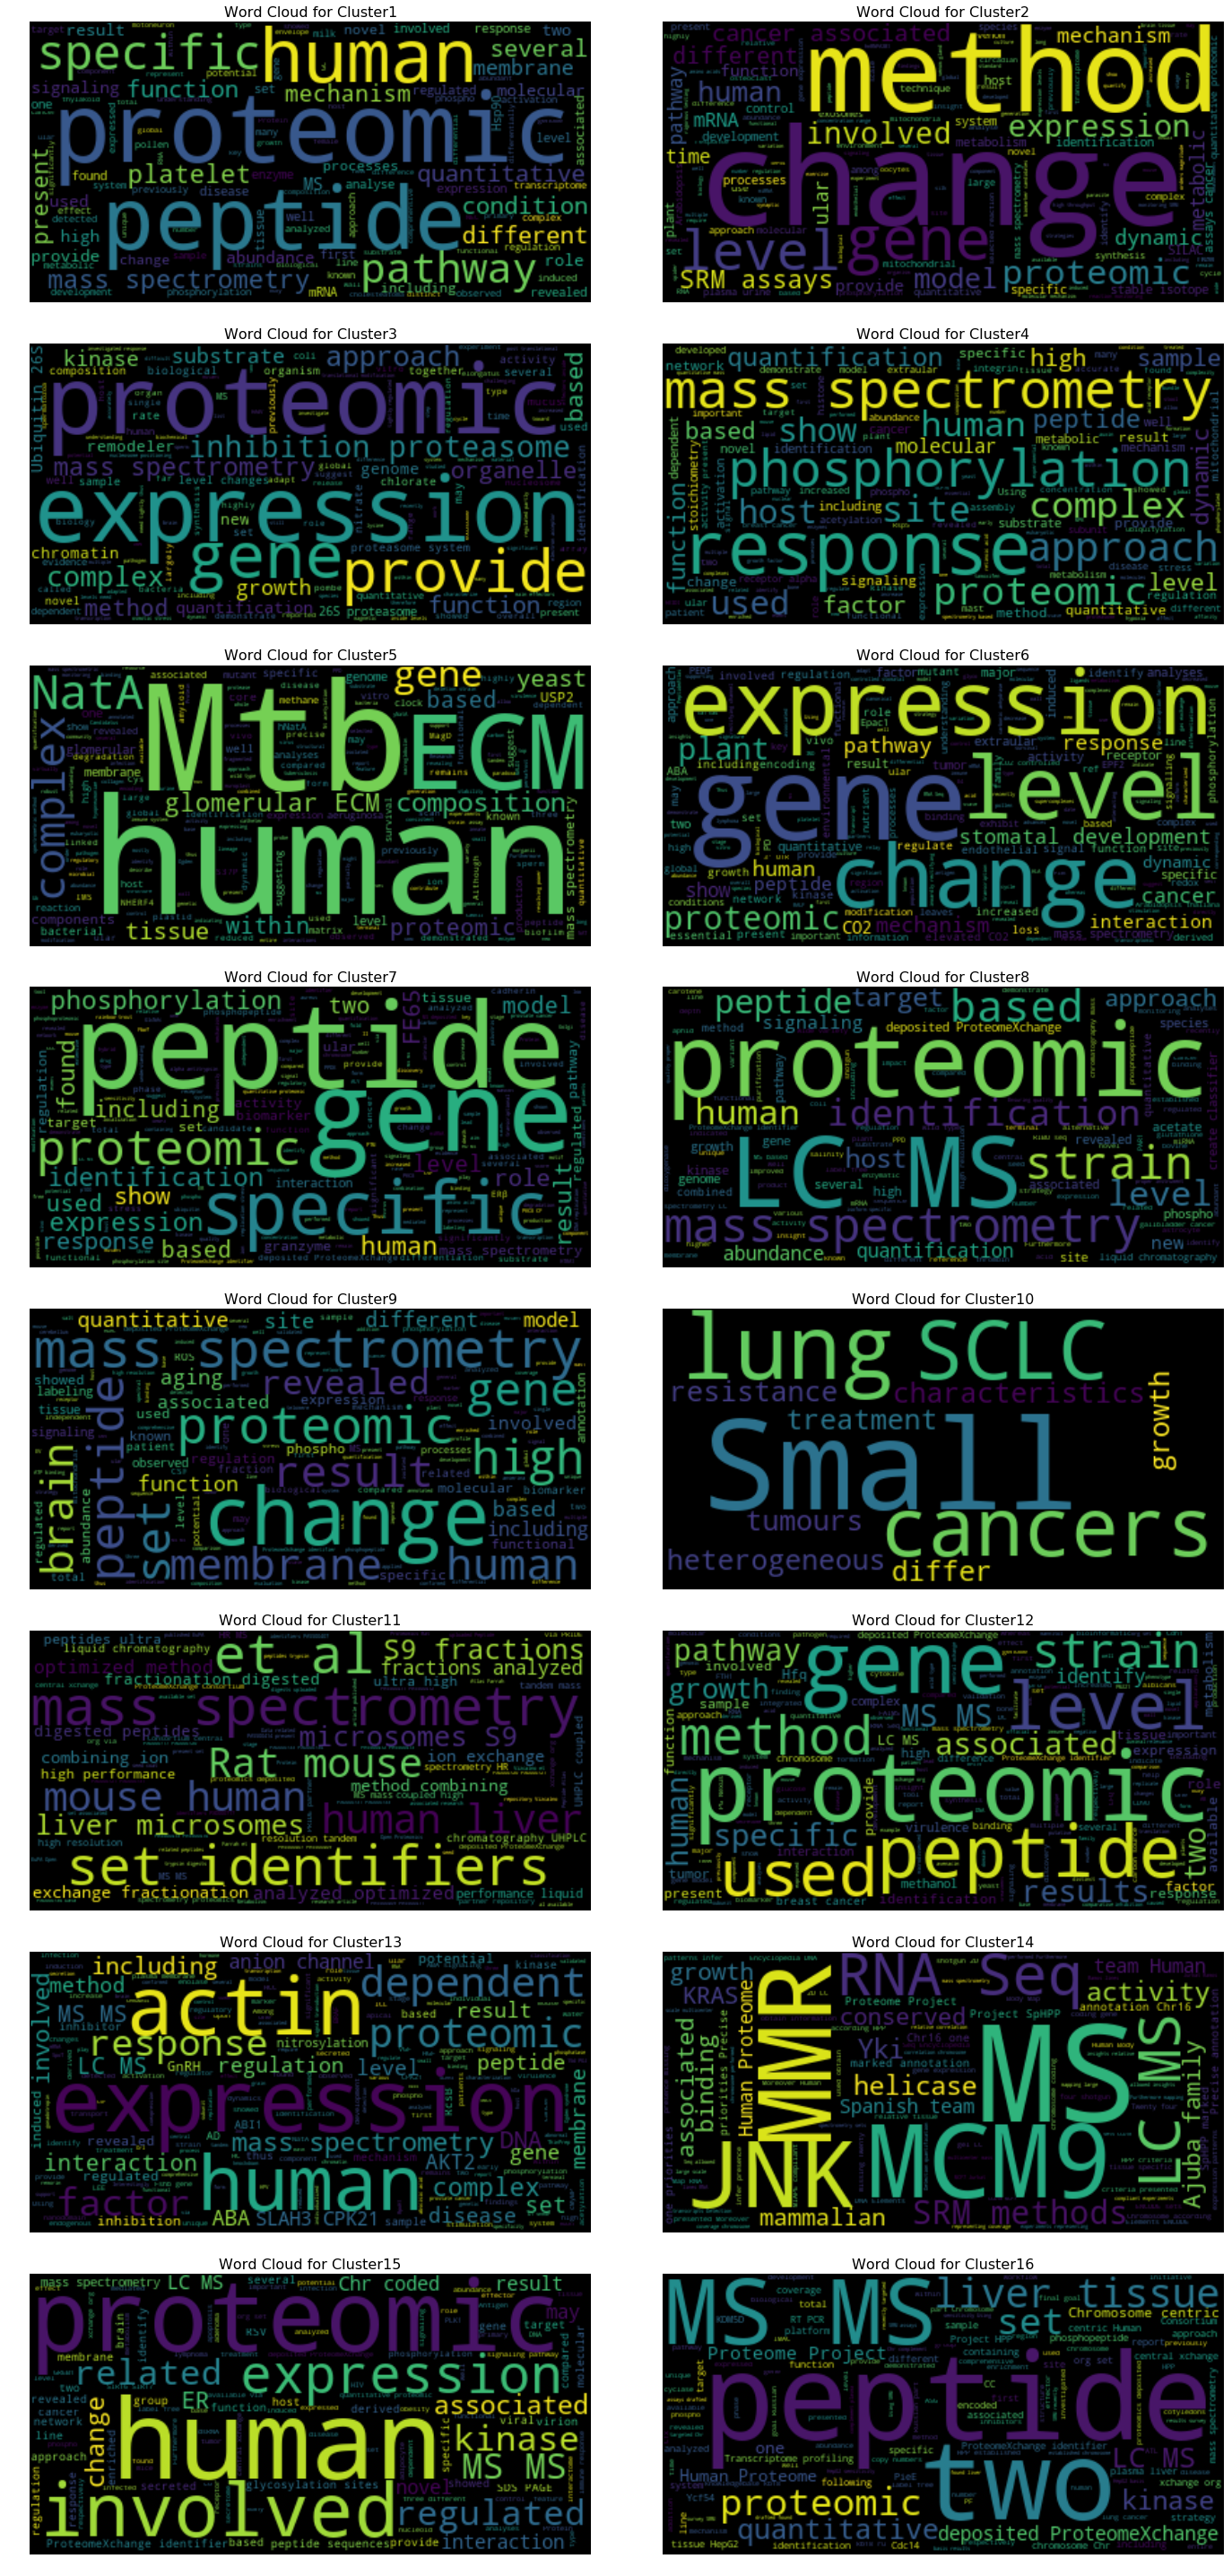

In [75]:
fig = plt.figure(figsize=(20, 40))
for i in range(1, 17):
    clstr = (np.argwhere(fcluster == i).flatten())
    clstr_text = ' '.join([docs1[j].text for j in clstr])
    clstr_text = clstr_text.replace('protein', '')
    clstr_text = clstr_text.replace('analysis', '')
    clstr_text = clstr_text.replace('identified', '')
    clstr_text = clstr_text.replace('proteome', '')
    clstr_text = clstr_text.replace('data', '')
    clstr_text = clstr_text.replace('studies', '')
    clstr_text = clstr_text.replace('study', '')
    clstr_text = clstr_text.replace('cell', '')
    clstr_text = clstr_text.replace('using', '')
    wc = WordCloud().generate(clstr_text)
    
    ax = fig.add_subplot(8, 2, i)
    ax.set_title('Word Cloud for Cluster%d' % i, fontsize=16)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')

fig.tight_layout()